In [ ]:
import random
import math
from datetime import datetime
import csv
import numpy as np

In [ ]:
def lat_lon_to_cartesian(lat, lon):
    # Define constants for the projection
        earth_radius = 6378137.0  # Earth's radius in meters
        origin_shift = 2 * math.pi * earth_radius / 2.0

        # Convert latitude and longitude to radians
        lat_rad = math.radians(lat)
        lon_rad = math.radians(lon)

        # Convert from latitude/longitude to meters
        x = lon_rad * earth_radius
        y = math.log(math.tan((math.pi / 4) + (lat_rad / 2))) * earth_radius

        return x, y

In [ ]:
def cartesian_to_lat_lon(x, y):
    # Define constants for the projection
        earth_radius = 6378137.0  # Earth's radius in meters
        origin_shift = 2 * math.pi * earth_radius / 2.0

        # Convert from meters to latitude/longitude
        lon = (x / origin_shift) * 180.0
        lat = (y / origin_shift) * 180.0

        # Adjust latitude for the Mercator projection
        lat = 180.0 / math.pi * (2.0 * math.atan(math.exp(lat * math.pi / 180.0)) - math.pi / 2.0)

        return lat, lon

In [ ]:
def dead_reckoning(x0, y0, z0, yaw, pitch, roll, vx, vy, vz, delta_t):

        """
        Estimate new position using dead reckoning with yaw, pitch, roll, and velocities.

        :param initial_position: tuple (x, y, z) representing initial position in meters
        :param velocities: tuple (vx, vy, vz) representing velocities in meters per second
        :param orientation: tuple (yaw, pitch, roll) in radians
        :param time_interval: time interval in seconds
        :return: tuple (new_x, new_y, new_z) representing the new position
        """
        global earth_position,position
        # Extract velocities
        yaw = yaw
        pitch = pitch
        roll = roll

        # Calculate the rotation matrix
        R_yaw = np.array([
            [math.cos(yaw), -math.sin(yaw), 0],
            [math.sin(yaw), math.cos(yaw), 0],
            [0, 0, 1]
        ])


        R_pitch = np.array([
            [math.cos(pitch), 0, math.sin(pitch)],
            [0, 1, 0],
            [-math.sin(pitch), 0, math.cos(pitch)]
        ])

        R_roll = np.array([
            [1, 0, 0],
            [0, math.cos(roll), -math.sin(roll)],
            [0, math.sin(roll), math.cos(roll)]
        ])

        # Combined rotation matrix
        R = R_yaw @ R_pitch @ R_roll
        print(R)

        # Velocity vector
        velocity = np.array([vx, vy, vz])

        # Rotate the velocity vector
        rotated_velocity = R @ velocity

        # Calculate the change in position
        delta_position = rotated_velocity * delta_t

        # Update the location
        x_new = x0 + delta_position[0]
        y_new = y0 + delta_position[1]
        z_new = z0 + delta_position[2]

    #return x_new, y_new, z_new
        lat=float(round(earth_position[0],15))
        lon=float(round(earth_position[1],15))
        alt=float(round(earth_position[2],15))
        x,y=lat_lon_to_cartesian(lat,lon)
        new_x=round(x+delta_position[1],15)
        new_y=round(y+delta_position[0],15)
        new_z=delta_position[2]
        new_lat, new_lon=cartesian_to_lat_lon(new_x, new_y)
        position=(x_new,y_new,z_new)
        earth_position=(round(new_lat,15),round(new_lon,15),new_z)

In [ ]:
earth_position=(13.5556252,80.0259484,0)
position=(0,0,0)
import math
import numpy as np

duration=657
steps=1
total_time= steps * duration
w=2*math.pi/(total_time)
r=5
ax=w*r

if __name__ == "__main__":
    # Create AUV object
    lon=[]
    lat=[]
    data=[]
    pos_x=[]
    pos_y=[]
    pos_z=[]
    depth=[]
    position_data=[]
    time_l=[]
    prev_time="08:32:10"
    with open("/content/Data_validation.csv", 'r') as file:
        global delta_t;
        csv_reader = csv.reader(file)
        #filename=data_niot_dead.csv
        #filename=actualdata1_12_06.csv
        # Skip the header row if present
        next(csv_reader, None)
        for i in range(657):
            # Assuming the CSV file has columns for x, y, heading, and possibly other data

            # time = float(row[0])
            time=1
            #print(row[1])
            vx = ax #*(1+0.002)+0.002+0.001
            vy= 0#*(1+0.002)+0.002+0.001
            vz=0#*(1+0.002)+0.002+0.001
            #roll=0
            #pitch=0
            delta_t=1
            roll=0#*(1+5.0e-6)+(0.0035*4.85e-5)+(0.0035*2.917e-4)
            pitch=0#*(1+5.0e-6)+(0.0035*4.85e-5)+(0.0035*2.917e-4)
            yaw =w*i*(1+0.001)+(0.02908)+(0.000582)
            dr=0.1
            # Add the data to a list of tuples
            #velocities = (vx, vy,vz)
            #orientation = (np.radians(roll), np.radians(pitch), np.radians(yaw))
            #delta_t=time_difference(prev_time,time)
            initial_position=np.array([position[0],position[1], position[2]])
            dead_reckoning(position[0],position[1], position[2], yaw, pitch, roll, vx, vy, vz, delta_t)
            lon.append(float(earth_position[1]))
            lat.append(float(earth_position[0]))
            position_data.append((earth_position[0],earth_position[1]))
            pos_x.append(float(position[0]))
            pos_y.append(float(position[1]))
            pos_z.append(float(position[2]))
            depth.append(dr)
            time_l.append(time)
            prev_time=time

[[ 0.99956012 -0.02965765  0.        ]
 [ 0.02965765  0.99956012  0.        ]
 [ 0.          0.          1.        ]]
[[ 0.99923041 -0.03922495  0.        ]
 [ 0.03922495  0.99923041  0.        ]
 [ 0.          0.          1.        ]]
[[ 0.99880912 -0.04878865  0.        ]
 [ 0.04878865  0.99880912  0.        ]
 [ 0.          0.          1.        ]]
[[ 0.99829631 -0.05834788  0.        ]
 [ 0.05834788  0.99829631  0.        ]
 [ 0.          0.          1.        ]]
[[ 0.99769201 -0.06790176  0.        ]
 [ 0.06790176  0.99769201  0.        ]
 [ 0.          0.          1.        ]]
[[ 0.99699628 -0.07744942  0.        ]
 [ 0.07744942  0.99699628  0.        ]
 [ 0.          0.          1.        ]]
[[ 0.99620919 -0.08698998  0.        ]
 [ 0.08698998  0.99620919  0.        ]
 [ 0.          0.          1.        ]]
[[ 0.9953308  -0.09652257  0.        ]
 [ 0.09652257  0.9953308   0.        ]
 [ 0.          0.          1.        ]]
[[ 0.99436119 -0.10604632  0.        ]
 [ 0.10604632  0.

In [ ]:
import pandas as pd
# Create a dictionary with sample data
data = {
    'x':pos_x,
    'y':pos_y,
    'z':pos_z,
    'lat':lat,
    'lon':lon,
    'time':time_l,
    'depth':depth
}

# Create DataFrame
df = pd.DataFrame(data)

# Write DataFrame to a CSV file
df.to_csv('real_time.csv', index=False)


In [ ]:
data_ideal=pd.read_csv("real_time.csv")
re_lat=np.array(data_ideal['lat'])
re_lon=np.array(data_ideal['lon'])
re_z=np.array(data_ideal['z'])
data_ideal.tail()

,x,y,z,lat,lon,time,depth
652,-0.159872,-0.001418,0.0,13.555624,80.025948,1,0.1
653,-0.112055,-0.001530,0.0,13.555624,80.025948,1,0.1
654,-0.064239,-0.001185,0.0,13.555625,80.025948,1,0.1
655,-0.016428,-0.000382,0.0,13.555625,80.025948,1,0.1
656,0.031372,0.000879,0.0,13.555625,80.025948,1,0.1


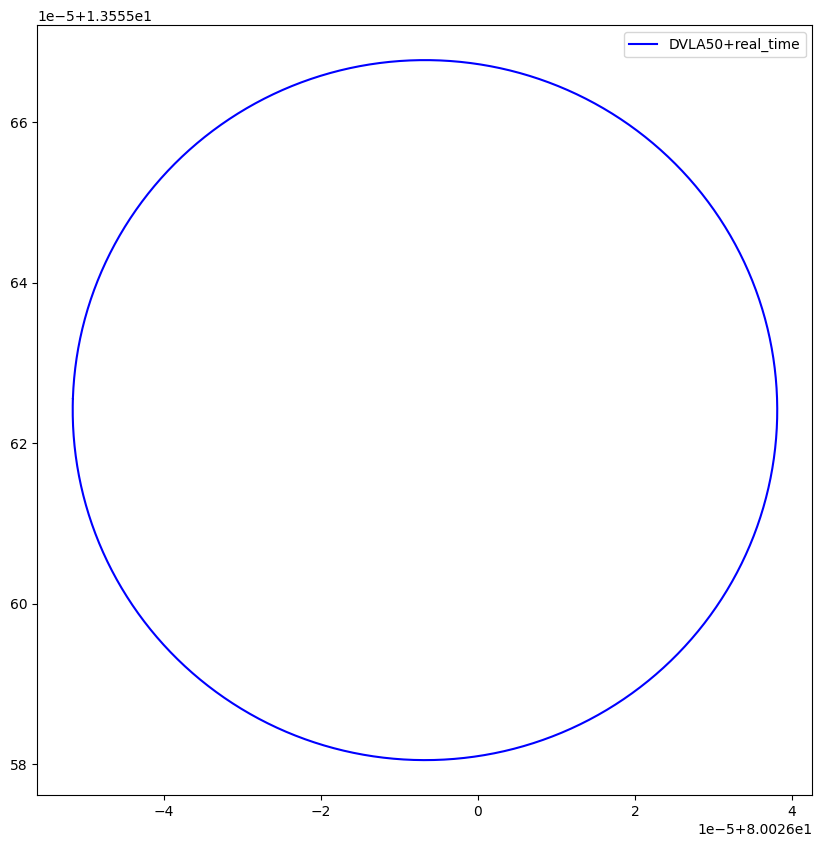

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10,10))
ax = plt.axes()

ax.plot(re_lon, re_lat, label="DVLA50+real_time", color="blue")
plt.legend()
plt.show()

In [ ]:
def dead_reckoning(x0, y0, z0, yaw, pitch, roll, vx, vy, vz, delta_t):

        """
        Estimate new position using dead reckoning with yaw, pitch, roll, and velocities.

        :param initial_position: tuple (x, y, z) representing initial position in meters
        :param velocities: tuple (vx, vy, vz) representing velocities in meters per second
        :param orientation: tuple (yaw, pitch, roll) in radians
        :param time_interval: time interval in seconds
        :return: tuple (new_x, new_y, new_z) representing the new position
        """
        global earth_position,position
        # Extract velocities
        yaw = yaw
        pitch = pitch
        roll = roll

        # Calculate the rotation matrix
        R_yaw = np.array([
            [math.cos(yaw), -math.sin(yaw), 0],
            [math.sin(yaw), math.cos(yaw), 0],
            [0, 0, 1]
        ])


        R_pitch = np.array([
            [math.cos(pitch), 0, math.sin(pitch)],
            [0, 1, 0],
            [-math.sin(pitch), 0, math.cos(pitch)]
        ])

        R_roll = np.array([
            [1, 0, 0],
            [0, math.cos(roll), -math.sin(roll)],
            [0, math.sin(roll), math.cos(roll)]
        ])

        # Combined rotation matrix
        R = R_yaw @ R_pitch @ R_roll
        print(R)

        # Velocity vector
        velocity = np.array([vx, vy, vz])

        # Rotate the velocity vector
        rotated_velocity = R @ velocity

        # Calculate the change in position
        delta_position = rotated_velocity * delta_t

        # Update the location
        x_new = x0 + delta_position[0]
        y_new = y0 + delta_position[1]
        z_new = z0 + delta_position[2]

    #return x_new, y_new, z_new
        lat=float(round(earth_position[0],15))
        lon=float(round(earth_position[1],15))
        alt=float(round(earth_position[2],15))
        x,y=lat_lon_to_cartesian(lat,lon)
        new_x=round(x+delta_position[1],15)
        new_y=round(y+delta_position[0],15)
        new_z=delta_position[2]
        new_lat, new_lon=cartesian_to_lat_lon(new_x, new_y)
        position=(x_new,y_new,z_new)
        earth_position=(round(new_lat,15),round(new_lon,15),new_z)

In [ ]:
earth_position=(13.5556252,80.0259484,0)
position=(0,0,0)
import math
import numpy as np

duration=657
steps=1
total_time= steps * duration
w=2*math.pi/(total_time)
r=5
ax=w*r

if __name__ == "__main__":
    # Create AUV object
    lon=[]
    lat=[]
    data=[]
    pos_x=[]
    pos_y=[]
    pos_z=[]
    depth=[]
    position_data=[]
    time_l=[]
    prev_time="08:32:10"
    with open("/content/Data_validation.csv", 'r') as file:
        global delta_t;
        csv_reader = csv.reader(file)
        #filename=data_niot_dead.csv
        #filename=actualdata1_12_06.csv
        # Skip the header row if present
        next(csv_reader, None)
        for i in range(657):
            # Assuming the CSV file has columns for x, y, heading, and possibly other data

            # time = float(row[0])
            time=1
            #print(row[1])
            vx = ax #*(1+0.002)+0.002+0.001
            vy= 0#*(1+0.002)+0.002+0.001
            vz=0#*(1+0.002)+0.002+0.001
            #roll=0
            #pitch=0
            delta_t=1
            roll=0#*(1+5.0e-6)+(0.0035*4.85e-5)+(0.0035*2.917e-4)
            pitch=0#*(1+5.0e-6)+(0.0035*4.85e-5)+(0.0035*2.917e-4)
            yaw =w*i*(1+0.01)+(0.02908)+(0.000582)
            dr=0.1
            # Add the data to a list of tuples
            #velocities = (vx, vy,vz)
            #orientation = (np.radians(roll), np.radians(pitch), np.radians(yaw))
            #delta_t=time_difference(prev_time,time)
            initial_position=np.array([position[0],position[1], position[2]])
            dead_reckoning(position[0],position[1], position[2], yaw, pitch, roll, vx, vy, vz, delta_t)
            lon.append(float(earth_position[1]))
            lat.append(float(earth_position[0]))
            position_data.append((earth_position[0],earth_position[1]))
            pos_x.append(float(position[0]))
            pos_y.append(float(position[1]))
            pos_z.append(float(position[2]))
            depth.append(dr)
            time_l.append(time)
            prev_time=time

[[ 0.99956012 -0.02965765  0.        ]
 [ 0.02965765  0.99956012  0.        ]
 [ 0.          0.          1.        ]]
[[ 0.99922703 -0.03931095  0.        ]
 [ 0.03931095  0.99922703  0.        ]
 [ 0.          0.          1.        ]]
[[ 0.99880071 -0.04896058  0.        ]
 [ 0.04896058  0.99880071  0.        ]
 [ 0.          0.          1.        ]]
[[ 0.99828121 -0.05860565  0.        ]
 [ 0.05860565  0.99828121  0.        ]
 [ 0.          0.          1.        ]]
[[ 0.99766858 -0.06824524  0.        ]
 [ 0.06824524  0.99766858  0.        ]
 [ 0.          0.          1.        ]]
[[ 0.99696286 -0.07787847  0.        ]
 [ 0.07787847  0.99696286  0.        ]
 [ 0.          0.          1.        ]]
[[ 0.99616413 -0.08750444  0.        ]
 [ 0.08750444  0.99616413  0.        ]
 [ 0.          0.          1.        ]]
[[ 0.99527246 -0.09712224  0.        ]
 [ 0.09712224  0.99527246  0.        ]
 [ 0.          0.          1.        ]]
[[ 0.99428794 -0.10673098  0.        ]
 [ 0.10673098  0.

In [ ]:
import pandas as pd
# Create a dictionary with sample data
data = {
    'x':pos_x,
    'y':pos_y,
    'z':pos_z,
    'lat':lat,
    'lon':lon,
    'time':time_l,
    'depth':depth
}

# Create DataFrame
df = pd.DataFrame(data)

# Write DataFrame to a CSV file
df.to_csv('consumer_real_time.csv', index=False)


In [ ]:
data_ideal=pd.read_csv("consumer_real_time.csv")
re_lati=np.array(data_ideal['lat'])
re_loni=np.array(data_ideal['lon'])
re_z=np.array(data_ideal['z'])
data_ideal.tail()

,x,y,z,lat,lon,time,depth
652,0.119696,0.004422,0.0,13.555626,80.025948,1,0.1
653,0.167444,0.006996,0.0,13.555627,80.025948,1,0.1
654,0.215164,0.010032,0.0,13.555627,80.025948,1,0.1
655,0.262854,0.013528,0.0,13.555627,80.025949,1,0.1
656,0.310507,0.017484,0.0,13.555628,80.025949,1,0.1


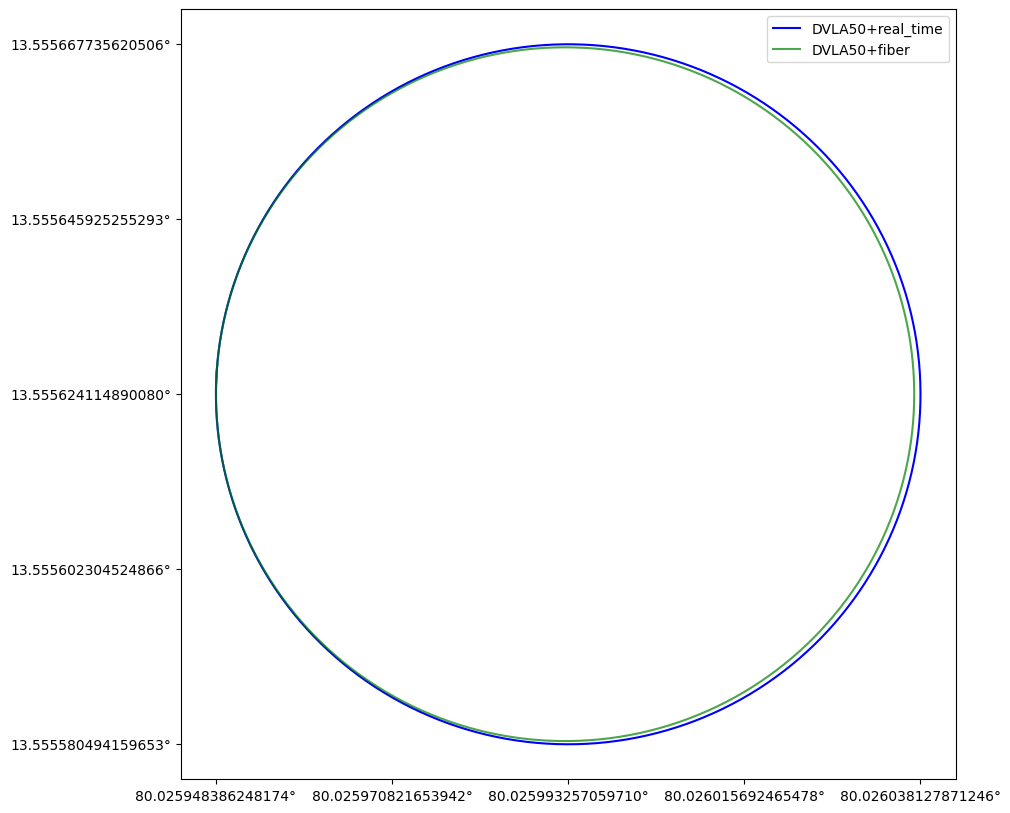

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10,10))
ax = plt.axes()

ax.plot(re_lon, re_lat, label="DVLA50+real_time", color="blue")
ax.plot(re_loni,re_lati,  label="DVLA50+fiber", alpha=0.7,color="green")


ax.set_yticks(np.linspace(min(re_lat), max(re_lat), num=5))
ax.set_yticklabels([f'{ln:.15f}°' for ln in np.linspace(min(re_lat), max(re_lat), num=5)])

ax.set_xticks(np.linspace(min(re_lon), max(re_lon), num=5))
ax.set_xticklabels([f'{ln:.15f}°' for ln in np.linspace(min(re_lon), max(re_lon), num=5)])

plt.legend()
plt.show()


In [ ]:
def dead_reckoning(x0, y0, z0, yaw, pitch, roll, vx, vy, vz, delta_t):

        """
        Estimate new position using dead reckoning with yaw, pitch, roll, and velocities.

        :param initial_position: tuple (x, y, z) representing initial position in meters
        :param velocities: tuple (vx, vy, vz) representing velocities in meters per second
        :param orientation: tuple (yaw, pitch, roll) in radians
        :param time_interval: time interval in seconds
        :return: tuple (new_x, new_y, new_z) representing the new position
        """
        global earth_position,position
        # Extract velocities
        yaw = yaw
        pitch = pitch
        roll = roll

        # Calculate the rotation matrix
        R_yaw = np.array([
            [math.cos(yaw), -math.sin(yaw), 0],
            [math.sin(yaw), math.cos(yaw), 0],
            [0, 0, 1]
        ])


        R_pitch = np.array([
            [math.cos(pitch), 0, math.sin(pitch)],
            [0, 1, 0],
            [-math.sin(pitch), 0, math.cos(pitch)]
        ])

        R_roll = np.array([
            [1, 0, 0],
            [0, math.cos(roll), -math.sin(roll)],
            [0, math.sin(roll), math.cos(roll)]
        ])

        # Combined rotation matrix
        R = R_yaw @ R_pitch @ R_roll
        print(R)

        # Velocity vector
        velocity = np.array([vx, vy, vz])

        # Rotate the velocity vector
        rotated_velocity = R @ velocity

        # Calculate the change in position
        delta_position = rotated_velocity * delta_t

        # Update the location
        x_new = x0 + delta_position[0]
        y_new = y0 + delta_position[1]
        z_new = z0 + delta_position[2]

    #return x_new, y_new, z_new
        lat=float(round(earth_position[0],15))
        lon=float(round(earth_position[1],15))
        alt=float(round(earth_position[2],15))
        x,y=lat_lon_to_cartesian(lat,lon)
        new_x=round(x+delta_position[1],15)
        new_y=round(y+delta_position[0],15)
        new_z=delta_position[2]
        new_lat, new_lon=cartesian_to_lat_lon(new_x, new_y)
        position=(x_new,y_new,z_new)
        earth_position=(round(new_lat,15),round(new_lon,15),new_z)

In [ ]:
earth_position=(13.5556252,80.0259484,0)
position=(0,0,0)
import math
import numpy as np

duration=657
steps=1
total_time= steps * duration
w=2*math.pi/(total_time)
r=5
ax=w*r

if __name__ == "__main__":
    # Create AUV object
    lon=[]
    lat=[]
    data=[]
    pos_x=[]
    pos_y=[]
    pos_z=[]
    depth=[]
    position_data=[]
    time_l=[]
    prev_time="08:32:10"
    with open("/content/Data_validation.csv", 'r') as file:
        global delta_t;
        csv_reader = csv.reader(file)
        #filename=data_niot_dead.csv
        #filename=actualdata1_12_06.csv
        # Skip the header row if present
        next(csv_reader, None)
        for i in range(657):
            # Assuming the CSV file has columns for x, y, heading, and possibly other data

            # time = float(row[0])
            time=1
            #print(row[1])
            vx = ax #*(1+0.002)+0.002+0.001
            vy= 0#*(1+0.002)+0.002+0.001
            vz=0#*(1+0.002)+0.002+0.001
            #roll=0
            #pitch=0
            delta_t=1
            roll=0#*(1+5.0e-6)+(0.0035*4.85e-5)+(0.0035*2.917e-4)
            pitch=0#*(1+5.0e-6)+(0.0035*4.85e-5)+(0.0035*2.917e-4)
            yaw =w*i*(1+0.01)+(0.002908)+(0.0000582)
            dr=0.1
            # Add the data to a list of tuples
            #velocities = (vx, vy,vz)
            #orientation = (np.radians(roll), np.radians(pitch), np.radians(yaw))
            #delta_t=time_difference(prev_time,time)
            initial_position=np.array([position[0],position[1], position[2]])
            dead_reckoning(position[0],position[1], position[2], yaw, pitch, roll, vx, vy, vz, delta_t)
            lon.append(float(earth_position[1]))
            lat.append(float(earth_position[0]))
            position_data.append((earth_position[0],earth_position[1]))
            pos_x.append(float(position[0]))
            pos_y.append(float(position[1]))
            pos_z.append(float(position[2]))
            depth.append(dr)
            time_l.append(time)
            prev_time=time

[[ 0.9999956 -0.0029662  0.       ]
 [ 0.0029662  0.9999956  0.       ]
 [ 0.         0.         1.       ]]
[[ 0.9999203  -0.01262495  0.        ]
 [ 0.01262495  0.9999203   0.        ]
 [ 0.          0.          1.        ]]
[[ 0.99975171 -0.02228252  0.        ]
 [ 0.02228252  0.99975171  0.        ]
 [ 0.          0.          1.        ]]
[[ 0.99948985 -0.03193802  0.        ]
 [ 0.03193802  0.99948985  0.        ]
 [ 0.          0.          1.        ]]
[[ 0.99913474 -0.04159053  0.        ]
 [ 0.04159053  0.99913474  0.        ]
 [ 0.          0.          1.        ]]
[[ 0.99868641 -0.05123916  0.        ]
 [ 0.05123916  0.99868641  0.        ]
 [ 0.          0.          1.        ]]
[[ 0.99814491 -0.06088302  0.        ]
 [ 0.06088302  0.99814491  0.        ]
 [ 0.          0.          1.        ]]
[[ 0.99751028 -0.07052119  0.        ]
 [ 0.07052119  0.99751028  0.        ]
 [ 0.          0.          1.        ]]
[[ 0.99678259 -0.08015279  0.        ]
 [ 0.08015279  0.99678259 

In [ ]:
import pandas as pd
# Create a dictionary with sample data
data = {
    'x':pos_x,
    'y':pos_y,
    'z':pos_z,
    'lat':lat,
    'lon':lon,
    'time':time_l,
    'depth':depth
}

# Create DataFrame
df = pd.DataFrame(data)

# Write DataFrame to a CSV file
df.to_csv('industrial_real_time.csv', index=False)


In [ ]:
data_ideal=pd.read_csv("industrial_real_time.csv")
re_lati1=np.array(data_ideal['lat'])
re_loni1=np.array(data_ideal['lon'])
re_z=np.array(data_ideal['z'])
data_ideal.tail()

,x,y,z,lat,lon,time,depth
652,0.119771,0.001226,0.0,13.555626,80.025948,1,0.1
653,0.167571,0.002524,0.0,13.555627,80.025948,1,0.1
654,0.215356,0.004285,0.0,13.555627,80.025948,1,0.1
655,0.263121,0.006506,0.0,13.555627,80.025948,1,0.1
656,0.310863,0.009189,0.0,13.555628,80.025948,1,0.1


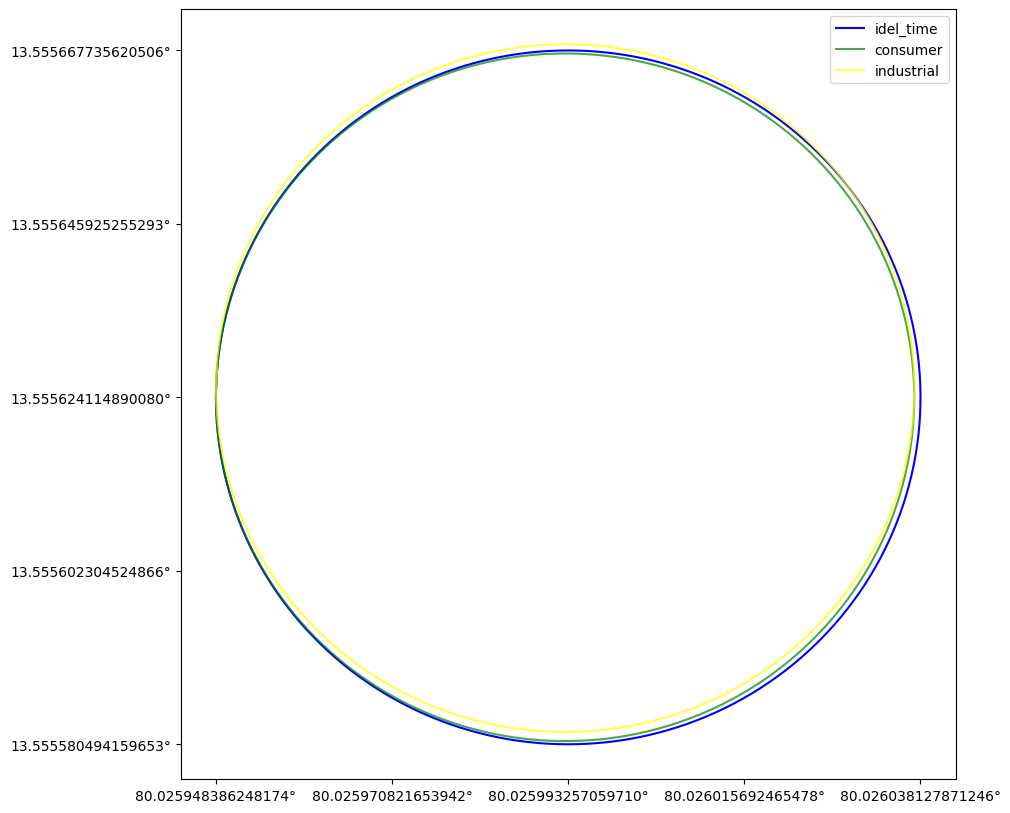

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10,10))
ax = plt.axes()

ax.plot(re_lon, re_lat, label="idel_time", color="blue")
ax.plot(re_loni,re_lati,  label="consumer", alpha=0.7,color="green")
ax.plot(re_loni1,re_lati1,  label="industrial", alpha=0.7,color="yellow")


ax.set_yticks(np.linspace(min(re_lat), max(re_lat), num=5))
ax.set_yticklabels([f'{ln:.15f}°' for ln in np.linspace(min(re_lat), max(re_lat), num=5)])

ax.set_xticks(np.linspace(min(re_lon), max(re_lon), num=5))
ax.set_xticklabels([f'{ln:.15f}°' for ln in np.linspace(min(re_lon), max(re_lon), num=5)])

plt.legend()
plt.show()


In [ ]:
def dead_reckoning(x0, y0, z0, yaw, pitch, roll, vx, vy, vz, delta_t):

        """
        Estimate new position using dead reckoning with yaw, pitch, roll, and velocities.

        :param initial_position: tuple (x, y, z) representing initial position in meters
        :param velocities: tuple (vx, vy, vz) representing velocities in meters per second
        :param orientation: tuple (yaw, pitch, roll) in radians
        :param time_interval: time interval in seconds
        :return: tuple (new_x, new_y, new_z) representing the new position
        """
        global earth_position,position
        # Extract velocities
        yaw = yaw
        pitch = pitch
        roll = roll

        # Calculate the rotation matrix
        R_yaw = np.array([
            [math.cos(yaw), -math.sin(yaw), 0],
            [math.sin(yaw), math.cos(yaw), 0],
            [0, 0, 1]
        ])


        R_pitch = np.array([
            [math.cos(pitch), 0, math.sin(pitch)],
            [0, 1, 0],
            [-math.sin(pitch), 0, math.cos(pitch)]
        ])

        R_roll = np.array([
            [1, 0, 0],
            [0, math.cos(roll), -math.sin(roll)],
            [0, math.sin(roll), math.cos(roll)]
        ])

        # Combined rotation matrix
        R = R_yaw @ R_pitch @ R_roll
        print(R)

        # Velocity vector
        velocity = np.array([vx, vy, vz])

        # Rotate the velocity vector
        rotated_velocity = R @ velocity

        # Calculate the change in position
        delta_position = rotated_velocity * delta_t

        # Update the location
        x_new = x0 + delta_position[0]
        y_new = y0 + delta_position[1]
        z_new = z0 + delta_position[2]

    #return x_new, y_new, z_new
        lat=float(round(earth_position[0],15))
        lon=float(round(earth_position[1],15))
        alt=float(round(earth_position[2],15))
        x,y=lat_lon_to_cartesian(lat,lon)
        new_x=round(x+delta_position[1],15)
        new_y=round(y+delta_position[0],15)
        new_z=delta_position[2]
        new_lat, new_lon=cartesian_to_lat_lon(new_x, new_y)
        position=(x_new,y_new,z_new)
        earth_position=(round(new_lat,15),round(new_lon,15),new_z)

In [ ]:
earth_position=(13.5556252,80.0259484,0)
position=(0,0,0)
import math
import numpy as np

duration=657
steps=1
total_time= steps * duration
w=2*math.pi/(total_time)
r=5
ax=w*r

if __name__ == "__main__":
    # Create AUV object
    lon=[]
    lat=[]
    data=[]
    pos_x=[]
    pos_y=[]
    pos_z=[]
    depth=[]
    position_data=[]
    time_l=[]
    prev_time="08:32:10"
    with open("/content/Data_validation.csv", 'r') as file:
        global delta_t;
        csv_reader = csv.reader(file)
        #filename=data_niot_dead.csv
        #filename=actualdata1_12_06.csv
        # Skip the header row if present
        next(csv_reader, None)
        for i in range(657):
            # Assuming the CSV file has columns for x, y, heading, and possibly other data

            # time = float(row[0])
            time=1
            #print(row[1])
            vx = ax #*(1+0.002)+0.002+0.001
            vy= 0#*(1+0.002)+0.002+0.001
            vz=0#*(1+0.002)+0.002+0.001
            #roll=0
            #pitch=0
            delta_t=1
            roll=0#*(1+5.0e-6)+(0.0035*4.85e-5)+(0.0035*2.917e-4)
            pitch=0#*(1+5.0e-6)+(0.0035*4.85e-5)+(0.0035*2.917e-4)
            yaw =w*i*(1+0.001)+(0.0002908)+(0.0000166)
            dr=0.1
            # Add the data to a list of tuples
            #velocities = (vx, vy,vz)
            #orientation = (np.radians(roll), np.radians(pitch), np.radians(yaw))
            #delta_t=time_difference(prev_time,time)
            initial_position=np.array([position[0],position[1], position[2]])
            dead_reckoning(position[0],position[1], position[2], yaw, pitch, roll, vx, vy, vz, delta_t)
            lon.append(float(earth_position[1]))
            lat.append(float(earth_position[0]))
            position_data.append((earth_position[0],earth_position[1]))
            pos_x.append(float(position[0]))
            pos_y.append(float(position[1]))
            pos_z.append(float(position[2]))
            depth.append(dr)
            time_l.append(time)
            prev_time=time

[[ 9.99999953e-01 -3.07399995e-04  0.00000000e+00]
 [ 3.07399995e-04  9.99999953e-01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[[ 0.99995119 -0.00988025  0.        ]
 [ 0.00988025  0.99995119  0.        ]
 [ 0.          0.          1.        ]]
[[ 0.99981079 -0.0194522   0.        ]
 [ 0.0194522   0.99981079  0.        ]
 [ 0.          0.          1.        ]]
[[ 0.99957876 -0.02902236  0.        ]
 [ 0.02902236  0.99957876  0.        ]
 [ 0.          0.          1.        ]]
[[ 0.99925513 -0.03858986  0.        ]
 [ 0.03858986  0.99925513  0.        ]
 [ 0.          0.          1.        ]]
[[ 0.99883993 -0.04815383  0.        ]
 [ 0.04815383  0.99883993  0.        ]
 [ 0.          0.          1.        ]]
[[ 0.99833319 -0.05771338  0.        ]
 [ 0.05771338  0.99833319  0.        ]
 [ 0.          0.          1.        ]]
[[ 0.99773497 -0.06726765  0.        ]
 [ 0.06726765  0.99773497  0.        ]
 [ 0.          0.          1.        ]]
[[ 0.99704531 -0.076

In [ ]:
import pandas as pd
# Create a dictionary with sample data
data = {
    'x':pos_x,
    'y':pos_y,
    'z':pos_z,
    'lat':lat,
    'lon':lon,
    'time':time_l,
    'depth':depth
}

# Create DataFrame
df = pd.DataFrame(data)

# Write DataFrame to a CSV file
df.to_csv('tactical_real_time.csv', index=False)


In [ ]:
data_ideal=pd.read_csv("tactical_real_time.csv")
re_lati2=np.array(data_ideal['lat'])
re_loni2=np.array(data_ideal['lon'])
re_z=np.array(data_ideal['z'])
data_ideal.tail()

,x,y,z,lat,lon,time,depth
652,-0.159845,0.003275,0.0,13.555624,80.025948,1,0.1
653,-0.112051,0.001759,0.0,13.555624,80.025948,1,0.1
654,-0.064246,0.000701,0.0,13.555625,80.025948,1,0.1
655,-0.016432,0.000101,0.0,13.555625,80.025948,1,0.1
656,0.031385,-0.000042,0.0,13.555625,80.025948,1,0.1


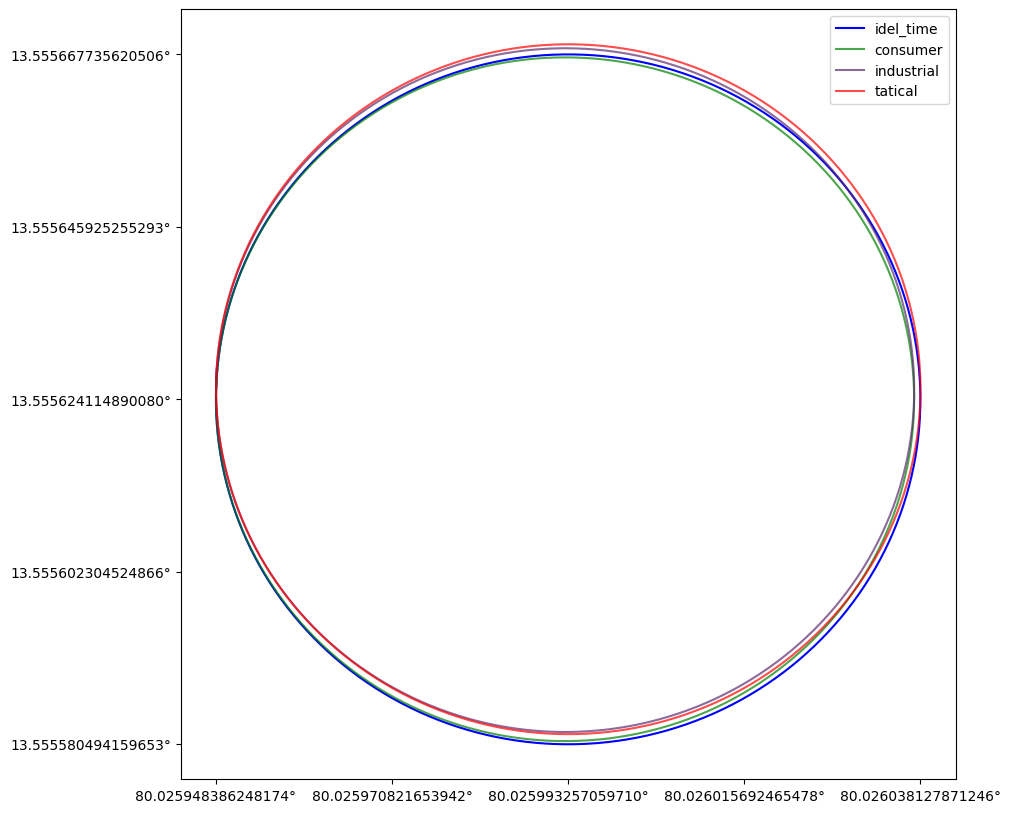

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10,10))
ax = plt.axes()

ax.plot(re_lon, re_lat, label="idel_time", color="blue")
ax.plot(re_loni,re_lati,  label="consumer", alpha=0.7,color="green")
ax.plot(re_loni1,re_lati1,  label="industrial", alpha=0.7,color="#5B2C6F")
ax.plot(re_loni2,re_lati2,  label="tatical", alpha=0.7,color="red")

ax.set_yticks(np.linspace(min(re_lat), max(re_lat), num=5))
ax.set_yticklabels([f'{ln:.15f}°' for ln in np.linspace(min(re_lat), max(re_lat), num=5)])

ax.set_xticks(np.linspace(min(re_lon), max(re_lon), num=5))
ax.set_xticklabels([f'{ln:.15f}°' for ln in np.linspace(min(re_lon), max(re_lon), num=5)])

plt.legend()
plt.show()


In [ ]:
def dead_reckoning(x0, y0, z0, yaw, pitch, roll, vx, vy, vz, delta_t):

        """
        Estimate new position using dead reckoning with yaw, pitch, roll, and velocities.

        :param initial_position: tuple (x, y, z) representing initial position in meters
        :param velocities: tuple (vx, vy, vz) representing velocities in meters per second
        :param orientation: tuple (yaw, pitch, roll) in radians
        :param time_interval: time interval in seconds
        :return: tuple (new_x, new_y, new_z) representing the new position
        """
        global earth_position,position
        # Extract velocities
        yaw = yaw
        pitch = pitch
        roll = roll

        # Calculate the rotation matrix
        R_yaw = np.array([
            [math.cos(yaw), -math.sin(yaw), 0],
            [math.sin(yaw), math.cos(yaw), 0],
            [0, 0, 1]
        ])


        R_pitch = np.array([
            [math.cos(pitch), 0, math.sin(pitch)],
            [0, 1, 0],
            [-math.sin(pitch), 0, math.cos(pitch)]
        ])

        R_roll = np.array([
            [1, 0, 0],
            [0, math.cos(roll), -math.sin(roll)],
            [0, math.sin(roll), math.cos(roll)]
        ])

        # Combined rotation matrix
        R = R_yaw @ R_pitch @ R_roll
        print(R)

        # Velocity vector
        velocity = np.array([vx, vy, vz])

        # Rotate the velocity vector
        rotated_velocity = R @ velocity

        # Calculate the change in position
        delta_position = rotated_velocity * delta_t

        # Update the location
        x_new = x0 + delta_position[0]
        y_new = y0 + delta_position[1]
        z_new = z0 + delta_position[2]

    #return x_new, y_new, z_new
        lat=float(round(earth_position[0],15))
        lon=float(round(earth_position[1],15))
        alt=float(round(earth_position[2],15))
        x,y=lat_lon_to_cartesian(lat,lon)
        new_x=round(x+delta_position[1],15)
        new_y=round(y+delta_position[0],15)
        new_z=delta_position[2]
        new_lat, new_lon=cartesian_to_lat_lon(new_x, new_y)
        position=(x_new,y_new,z_new)
        earth_position=(round(new_lat,15),round(new_lon,15),new_z)

In [ ]:
earth_position=(13.5556252,80.0259484,0)
position=(0,0,0)
import math
import numpy as np

duration=657
steps=1
total_time= steps * duration
w=2*math.pi/(total_time)
r=5
ax=w*r

if __name__ == "__main__":
    # Create AUV object
    lon=[]
    lat=[]
    data=[]
    pos_x=[]
    pos_y=[]
    pos_z=[]
    depth=[]
    position_data=[]
    time_l=[]
    prev_time="08:32:10"
    with open("/content/Data_validation.csv", 'r') as file:
        global delta_t;
        csv_reader = csv.reader(file)
        #filename=data_niot_dead.csv
        #filename=actualdata1_12_06.csv
        # Skip the header row if present
        next(csv_reader, None)
        for i in range(657):
            # Assuming the CSV file has columns for x, y, heading, and possibly other data

            # time = float(row[0])
            time=1
            #print(row[1])
            vx = ax #*(1+0.002)+0.002+0.001
            vy= 0#*(1+0.002)+0.002+0.001
            vz=0#*(1+0.002)+0.002+0.001
            #roll=0
            #pitch=0
            delta_t=1
            roll=0#*(1+5.0e-6)+(0.0035*4.85e-5)+(0.0035*2.917e-4)
            pitch=0#*(1+5.0e-6)+(0.0035*4.85e-5)+(0.0035*2.917e-4)
            yaw =w*i*(1+0.0001)+(0.00002908)+(0.00001164)
            dr=0.1
            # Add the data to a list of tuples
            #velocities = (vx, vy,vz)
            #orientation = (np.radians(roll), np.radians(pitch), np.radians(yaw))
            #delta_t=time_difference(prev_time,time)
            initial_position=np.array([position[0],position[1], position[2]])
            dead_reckoning(position[0],position[1], position[2], yaw, pitch, roll, vx, vy, vz, delta_t)
            lon.append(float(earth_position[1]))
            lat.append(float(earth_position[0]))
            position_data.append((earth_position[0],earth_position[1]))
            pos_x.append(float(position[0]))
            pos_y.append(float(position[1]))
            pos_z.append(float(position[2]))
            depth.append(dr)
            time_l.append(time)
            prev_time=time

[[ 9.99999999e-01 -4.07200000e-05  0.00000000e+00]
 [ 4.07200000e-05  9.99999999e-01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[[ 0.99995387 -0.00960498  0.        ]
 [ 0.00960498  0.99995387  0.        ]
 [ 0.          0.          1.        ]]
[[ 0.99981627 -0.01916835  0.        ]
 [ 0.01916835  0.99981627  0.        ]
 [ 0.          0.          1.        ]]
[[ 0.99958721 -0.02872998  0.        ]
 [ 0.02872998  0.99958721  0.        ]
 [ 0.          0.          1.        ]]
[[ 0.99926671 -0.03828898  0.        ]
 [ 0.03828898  0.99926671  0.        ]
 [ 0.          0.          1.        ]]
[[ 0.9988548  -0.04784447  0.        ]
 [ 0.04784447  0.9988548   0.        ]
 [ 0.          0.          1.        ]]
[[ 0.99835151 -0.05739559  0.        ]
 [ 0.05739559  0.99835151  0.        ]
 [ 0.          0.          1.        ]]
[[ 0.99775691 -0.06694145  0.        ]
 [ 0.06694145  0.99775691  0.        ]
 [ 0.          0.          1.        ]]
[[ 0.99707102 -0.076

In [ ]:
import pandas as pd
# Create a dictionary with sample data
data = {
    'x':pos_x,
    'y':pos_y,
    'z':pos_z,
    'lat':lat,
    'lon':lon,
    'time':time_l,
    'depth':depth
}

# Create DataFrame
df = pd.DataFrame(data)

# Write DataFrame to a CSV file
df.to_csv('naviga_real_time.csv', index=False)


In [ ]:
data_ideal=pd.read_csv("naviga_real_time.csv")
re_lati3=np.array(data_ideal['lat'])
re_loni3=np.array(data_ideal['lon'])
re_z=np.array(data_ideal['z'])
data_ideal.tail()

,x,y,z,lat,lon,time,depth
652,-0.188065,0.004431,0.0,13.555624,80.025948,1,0.1
653,-0.140282,0.002634,0.0,13.555624,80.025948,1,0.1
654,-0.092483,0.001294,0.0,13.555624,80.025948,1,0.1
655,-0.044674,0.000411,0.0,13.555625,80.025948,1,0.1
656,0.003141,-0.000014,0.0,13.555625,80.025948,1,0.1


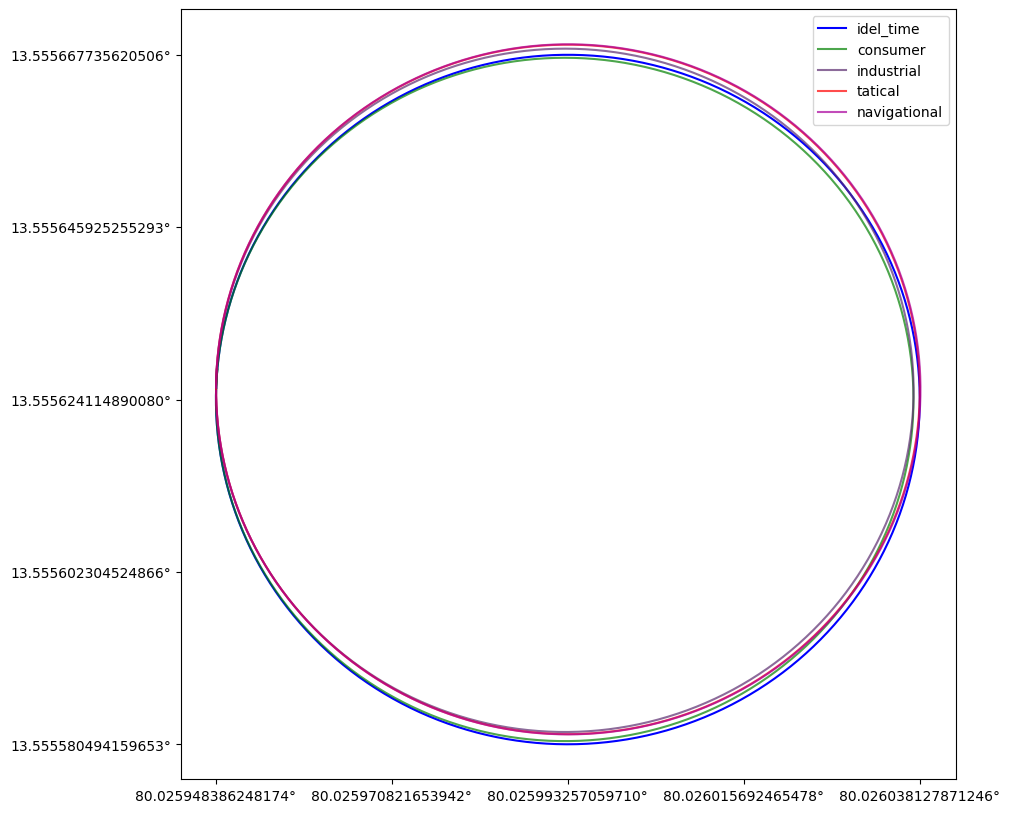

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10,10))
ax = plt.axes()

ax.plot(re_lon, re_lat, label="idel_time", color="blue")
ax.plot(re_loni,re_lati,  label="consumer", alpha=0.7,color="green")
ax.plot(re_loni1,re_lati1,  label="industrial", alpha=0.7,color="#5B2C6F")
ax.plot(re_loni2,re_lati2,  label="tatical", alpha=0.7,color="red")
ax.plot(re_loni3,re_lati3,  label="navigational", alpha=0.7,color="#a9009c")

ax.set_yticks(np.linspace(min(re_lat), max(re_lat), num=5))
ax.set_yticklabels([f'{ln:.15f}°' for ln in np.linspace(min(re_lat), max(re_lat), num=5)])

ax.set_xticks(np.linspace(min(re_lon), max(re_lon), num=5))
ax.set_xticklabels([f'{ln:.15f}°' for ln in np.linspace(min(re_lon), max(re_lon), num=5)])

plt.legend()
plt.show()


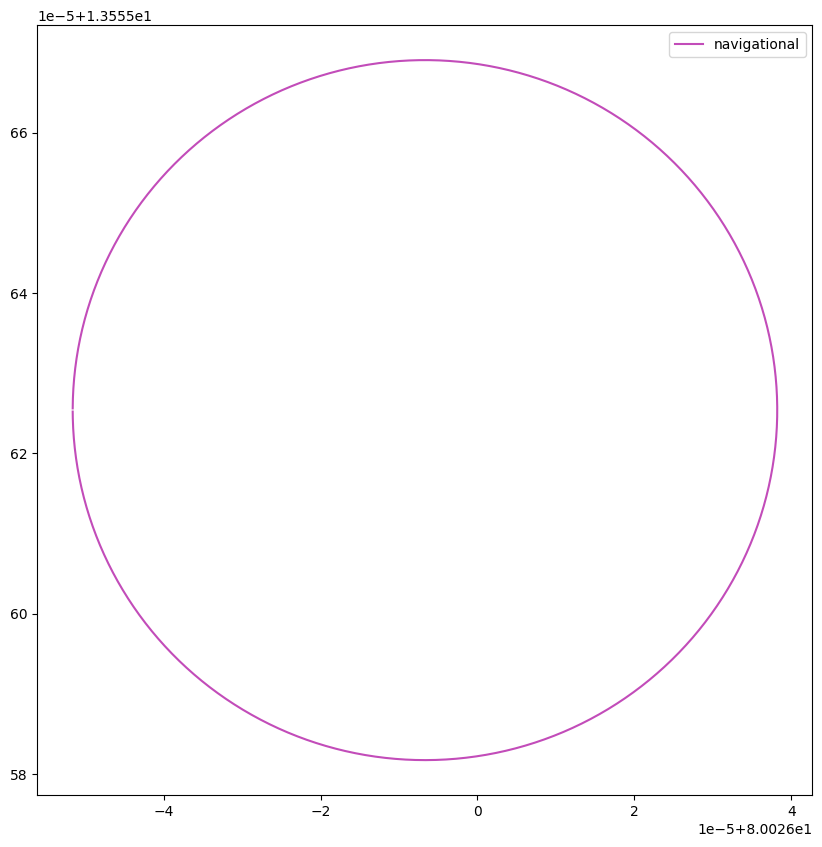

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10,10))
ax = plt.axes()


ax.plot(re_loni3,re_lati3,  label="navigational", alpha=0.7,color="#a9009c")



plt.legend()
plt.show()


In [ ]:
earth_position=(13.5556252,80.0259484,0)
position=(0,0,0)

if __name__ == "__main__":
    # Create AUV object
    lon=[]
    lat=[]
    data=[]
    pos_x=[]
    pos_y=[]
    pos_z=[]
    depth=[]
    position_data=[]
    time_l=[]
    prev_time="08:32:10"
    with open("/content/Data_validation.csv", 'r') as file:
        csv_reader = csv.reader(file)
        #filename=data_niot_dead.csv
        #filename=actualdata1_12_06.csv
        # Skip the header row if present
        next(csv_reader, None)
        for row in csv_reader:
            # Assuming the CSV file has columns for x, y, heading, and possibly other data

            time = float(row[0])
            #print(row[1])
            vx = float(0.01234)#*(1+0.002)+0.002+0.001

            vy= float(0.002)#*(1+0.002)+0.002+0.001
            vz=float(-0.001)#*(1+0.002)+0.002+0.001
            #roll=0
            #pitch=0
            roll=math.radians(float(row[4]))#*(1+5.0e-6)+(0.0035*4.85e-5)+(0.0035*2.917e-4)
            pitch=math.radians(float(row[5]))#*(1+5.0e-6)+(0.0035*4.85e-5)+(0.0035*2.917e-4)
            yaw = math.radians(float(row[6]))#*(1+5.0e-6)+(0.0035*4.85e-5)+(0.0035*2.917e-4)
            dr=0.1
            # Add the data to a list of tuples
            #velocities = (vx, vy,vz)
            #orientation = (np.radians(roll), np.radians(pitch), np.radians(yaw))
            delta_t=1
            #delta_t=time_difference(prev_time,time)
            initial_position=np.array([position[0],position[1], position[2]])
            dead_reckoning(position[0],position[1], position[2], yaw, pitch, roll, vx, vy, vz, delta_t)
            lon.append(float(earth_position[1]))
            lat.append(float(earth_position[0]))
            position_data.append((earth_position[0],earth_position[1]))
            pos_x.append(float(position[0]))
            pos_y.append(float(position[1]))
            pos_z.append(float(position[2]))
            depth.append(dr)
            time_l.append(time)
            prev_time=time

[[-8.19381043e-02  9.96637059e-01 -8.48833444e-04]
 [-9.96632469e-01 -8.19403522e-02 -3.08239970e-03]
 [-3.14158749e-03  5.93408982e-04  9.99994889e-01]]
[[-0.05826051  0.99826053 -0.00903437]
 [-0.99829327 -0.0582211   0.00456563]
 [ 0.0040317   0.00928494  0.99994877]]
[[-0.04361841  0.99903305 -0.00551405]
 [-0.99902578 -0.04357974  0.00694903]
 [ 0.00670201  0.00581178  0.99996065]]
[[-3.54223487e-02  9.99372431e-01  3.35689158e-05]
 [-9.99360483e-01 -3.54220895e-02  4.88878142e-03]
 [ 4.88690245e-03  1.39624672e-04  9.99988049e-01]]
[[-0.02704908  0.99961709  0.00583255]
 [-0.99962583 -0.02707213  0.0039102 ]
 [ 0.00406661 -0.0057246   0.99997535]]
[[-0.01797587  0.9997722   0.01150737]
 [-0.9998356  -0.01800195  0.00216698]
 [ 0.00237365 -0.01146653  0.99993144]]
[[-1.83696902e-16  9.99977307e-01  6.73691995e-03]
 [-9.99999356e-01  7.64279161e-06 -1.13443803e-03]
 [-1.13446377e-03 -6.73691562e-03  9.99976663e-01]]
[[ 0.02094213  0.99950264  0.02357736]
 [-0.99976689  0.02105993 -

In [ ]:
import pandas as pd

# Create a dictionary with sample data
data = {
    'x':pos_x,
    'y':pos_y,
    'z':pos_z,
    'lat':lat,
    'lon':lon,
    'time':time_l,
    'depth':depth
}

# Create DataFrame
df = pd.DataFrame(data)

# Write DataFrame to a CSV file
df.to_csv('ideal.csv', index=False)

In [ ]:
data_bias=pd.read_csv("ideal.csv")
id_lat=np.array(data_bias['lat'])
id_lon=np.array(data_bias['lon'])
id_z=np.array(data_bias['z'])
data_bias.tail()

,x,y,z,lat,lon,time,depth
652,8.078757,1.158855,-0.666696,13.555696,80.025959,653.0,0.1
653,8.091143,1.160522,-0.667740,13.555696,80.025959,654.0,0.1
654,8.103529,1.162178,-0.668798,13.555696,80.025959,655.0,0.1
655,8.115911,1.163828,-0.669903,13.555696,80.025959,656.0,0.1
656,8.128293,1.165479,-0.671022,13.555696,80.025959,657.0,0.1


In [ ]:
earth_position=(13.5556252,80.0259484,0)
position=(0,0,0)

if __name__ == "__main__":
    # Create AUV object
    lon=[]
    lat=[]
    data=[]
    pos_x=[]
    pos_y=[]
    pos_z=[]
    depth=[]
    position_data=[]
    time_l=[]
    prev_time="08:32:10"
    with open("/content/Data_validation.csv", 'r') as file:
        csv_reader = csv.reader(file)
        #filename=data_niot_dead.csv
        #filename=actualdata1_12_06.csv
        # Skip the header row if present
        next(csv_reader, None)
        for row in csv_reader:
            # Assuming the CSV file has columns for x, y, heading, and possibly other data

            time = float(row[0])
            #print(row[1])
            vx = float(row[1])*(1+0.002)+0.002+0.001

            vy= float(row[2])*(1+0.002)+0.002+0.001
            vz=float(row[3])*(1+0.002)+0.002+0.001
            #roll=0
            #pitch=0
            roll=math.radians(float(row[4]))*(1+5.0e-4)+(0.007)+(0.00004375)
            pitch=math.radians(float(row[5]))*(1+5.0e-4)+(0.007)+(0.00004375)
            yaw = math.radians(float(row[6]))*(1+5.0e-4)+(0.007)+(0.00004375)
            dr=0.1
            # Add the data to a list of tuples
            #velocities = (vx, vy,vz)
            #orientation = (np.radians(roll), np.radians(pitch), np.radians(yaw))
            delta_t=1
            #delta_t=time_difference(prev_time,time)
            initial_position=np.array([position[0],position[1], position[2]])
            dead_reckoning(position[0],position[1], position[2], yaw, pitch, roll, vx, vy, vz, delta_t)
            lon.append(float(earth_position[1]))
            lat.append(float(earth_position[0]))
            position_data.append((earth_position[0],earth_position[1]))
            pos_x.append(float(position[0]))
            pos_y.append(float(position[1]))
            pos_z.append(float(position[2]))
            depth.append(dr)
            time_l.append(time)
            prev_time=time

In [ ]:
import pandas as pd

# Create a dictionary with sample data
data = {
    'x':pos_x,
    'y':pos_y,
    'z':pos_z,
    'lat':lat,
    'lon':lon,
    'time':time_l,
    'depth':depth
}

# Create DataFrame
df = pd.DataFrame(data)

# Write DataFrame to a CSV file
df.to_csv('ins.csv', index=False)

In [ ]:
data_bias=pd.read_csv("ins.csv")
in_lat=np.array(data_bias['lat'])
in_lon=np.array(data_bias['lon'])
in_z=np.array(data_bias['z'])
data_bias.tail()

,x,y,z,lat,lon,time,depth
652,9.629766,-16.959442,-6.028594,13.555709,80.025796,653.0,0.1
653,9.647053,-15.921077,-6.069205,13.555709,80.025805,654.0,0.1
654,9.460514,-14.777050,-6.128019,13.555708,80.025816,655.0,0.1
655,8.974175,-13.773176,-6.162333,13.555704,80.025825,656.0,0.1
656,8.252963,-12.952955,-6.173466,13.555697,80.025832,657.0,0.1


In [ ]:
earth_position=(13.5556252,80.0259484,0)
position=(0,0,0)

if __name__ == "__main__":
    # Create AUV object
    lon=[]
    lat=[]
    data=[]
    pos_x=[]
    pos_y=[]
    pos_z=[]
    depth=[]
    position_data=[]
    time_l=[]
    prev_time="08:32:10"
    with open("/content/Data_validation.csv", 'r') as file:
        csv_reader = csv.reader(file)
        #filename=data_niot_dead.csv
        #filename=actualdata1_12_06.csv
        # Skip the header row if present
        next(csv_reader, None)
        for row in csv_reader:
            # Assuming the CSV file has columns for x, y, heading, and possibly other data

            time = float(row[0])
            #print(row[1])
            vx = float(row[1])*(1+0.002)+0.002+0.001

            vy= float(row[2])*(1+0.002)+0.002+0.001
            vz=float(row[3])*(1+0.002)+0.002+0.001
            #roll=0
            #pitch=0
            roll=math.radians(float(row[4]))*(1+5.0e-3)+(0.0105)+(0.00021)
            pitch=math.radians(float(row[5]))*(1+5.0e-3)+(0.0105)+(0.00021)
            yaw = math.radians(float(row[6]))*(1+5.0e-3)+(0.0105)+(0.00021)
            dr=0.1
            # Add the data to a list of tuples
            #velocities = (vx, vy,vz)
            #orientation = (np.radians(roll), np.radians(pitch), np.radians(yaw))
            delta_t=1
            #delta_t=time_difference(prev_time,time)
            initial_position=np.array([position[0],position[1], position[2]])
            dead_reckoning(position[0],position[1], position[2], yaw, pitch, roll, vx, vy, vz, delta_t)
            lon.append(float(earth_position[1]))
            lat.append(float(earth_position[0]))
            position_data.append((earth_position[0],earth_position[1]))
            pos_x.append(float(position[0]))
            pos_y.append(float(position[1]))
            pos_z.append(float(position[2]))
            depth.append(dr)
            time_l.append(time)
            prev_time=time

In [ ]:
import pandas as pd

# Create a dictionary with sample data
data = {
    'x':pos_x,
    'y':pos_y,
    'z':pos_z,
    'lat':lat,
    'lon':lon,
    'time':time_l,
    'depth':depth
}

# Create DataFrame
df = pd.DataFrame(data)

# Write DataFrame to a CSV file
df.to_csv('mems.csv', index=False)

In [ ]:
data_bias=pd.read_csv("mems.csv")
me_lat=np.array(data_bias['lat'])
me_lon=np.array(data_bias['lon'])
me_z=np.array(data_bias['z'])
data_bias.tail()

,x,y,z,lat,lon,time,depth
652,9.666511,-16.901197,-6.124962,13.555710,80.025797,653.0,0.1
653,9.679997,-15.862637,-6.161877,13.555710,80.025806,654.0,0.1
654,9.489232,-14.719071,-6.215879,13.555708,80.025816,655.0,0.1
655,8.999266,-13.716791,-6.244802,13.555704,80.025825,656.0,0.1
656,8.275159,-12.899069,-6.250354,13.555697,80.025833,657.0,0.1


In [ ]:
earth_position=(13.5556252,80.0259484,0)
position=(0,0,0)

if __name__ == "__main__":
    # Create AUV object
    lon=[]
    lat=[]
    data=[]
    pos_x=[]
    pos_y=[]
    pos_z=[]
    depth=[]
    position_data=[]
    time_l=[]
    prev_time="08:32:10"
    with open("/content/Data_validation.csv", 'r') as file:
        csv_reader = csv.reader(file)
        #filename=data_niot_dead.csv
        #filename=actualdata1_12_06.csv
        # Skip the header row if present
        next(csv_reader, None)
        for row in csv_reader:
            # Assuming the CSV file has columns for x, y, heading, and possibly other data

            time = float(row[0])
            #print(row[1])
            vx = float(row[1])*(1+0.002)+0.002+0.001

            vy= float(row[2])*(1+0.002)+0.002+0.001
            vz=float(row[3])*(1+0.002)+0.002+0.001
            #roll=0
            #pitch=0
            roll=math.radians(float(row[4]))*(1+2.0e-4)+(1.4583e-7)+(4.375e-7)
            pitch=math.radians(float(row[5]))*(1+2.0e-4)+(1.4583e-7)+(4.375e-7)
            yaw = math.radians(float(row[6]))*(1+2.0e-4)+(1.4583e-7)+(4.375e-7)
            dr=0.1
            # Add the data to a list of tuples
            #velocities = (vx, vy,vz)
            #orientation = (np.radians(roll), np.radians(pitch), np.radians(yaw))
            delta_t=1
            #delta_t=time_difference(prev_time,time)
            initial_position=np.array([position[0],position[1], position[2]])
            dead_reckoning(position[0],position[1], position[2], yaw, pitch, roll, vx, vy, vz, delta_t)
            lon.append(float(earth_position[1]))
            lat.append(float(earth_position[0]))
            position_data.append((earth_position[0],earth_position[1]))
            pos_x.append(float(position[0]))
            pos_y.append(float(position[1]))
            pos_z.append(float(position[2]))
            depth.append(dr)
            time_l.append(time)
            prev_time=time

In [ ]:
import pandas as pd

# Create a dictionary with sample data
data = {
    'x':pos_x,
    'y':pos_y,
    'z':pos_z,
    'lat':lat,
    'lon':lon,
    'time':time_l,
    'depth':depth
}

# Create DataFrame
df = pd.DataFrame(data)

# Write DataFrame to a CSV file
df.to_csv('fiber.csv', index=False)

In [ ]:
data_bias=pd.read_csv("fiber.csv")
fi_lat=np.array(data_bias['lat'])
fi_lon=np.array(data_bias['lon'])
fi_z=np.array(data_bias['z'])
data_bias.tail()

,x,y,z,lat,lon,time,depth
652,9.551616,-17.070166,-5.836612,13.555709,80.025795,653.0,0.1
653,9.576489,-16.032267,-5.884537,13.555709,80.025804,654.0,0.1
654,9.398406,-14.887420,-5.952834,13.555707,80.025815,655.0,0.1
655,8.919358,-13.880461,-5.997703,13.555703,80.025824,656.0,0.1
656,8.203996,-13.055352,-6.019698,13.555697,80.025831,657.0,0.1


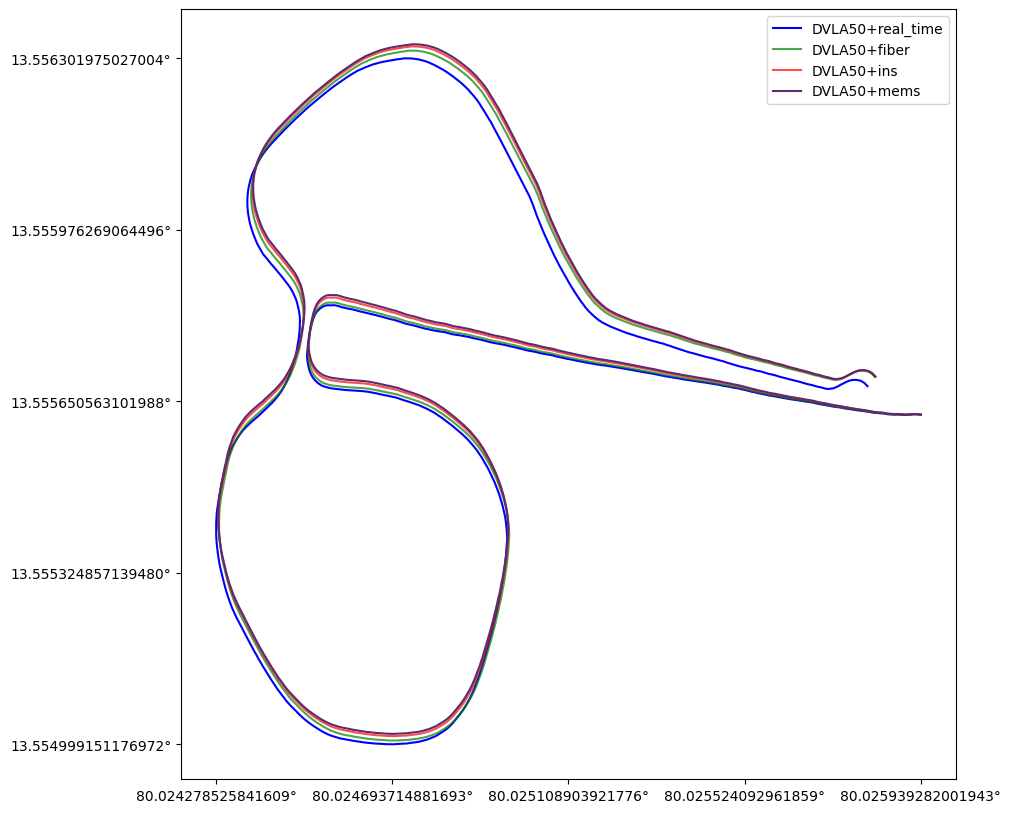

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10,10))
ax = plt.axes()

ax.plot(re_lon, re_lat, label="DVLA50+real_time", color="blue")
ax.plot(fi_lon,fi_lat,  label="DVLA50+fiber", alpha=0.7,color="green")
ax.plot(in_lon,in_lat,  label="DVLA50+ins", alpha=0.7, color="red")
ax.plot(me_lon,me_lat,  label="DVLA50+mems",color="#5B2C6F")

ax.set_yticks(np.linspace(min(re_lat), max(re_lat), num=5))
ax.set_yticklabels([f'{ln:.15f}°' for ln in np.linspace(min(re_lat), max(re_lat), num=5)])

ax.set_xticks(np.linspace(min(re_lon), max(re_lon), num=5))
ax.set_xticklabels([f'{ln:.15f}°' for ln in np.linspace(min(re_lon), max(re_lon), num=5)])

plt.legend()
plt.show()


In [ ]:
import folium
import numpy as np

map_center = [np.mean(re_lat), np.mean(re_lon)]
mymap = folium.Map(location=map_center, zoom_start=14)

folium.PolyLine(
    locations=[[re_lat[i], re_lon[i]] for i in range(len(re_lat))],
    color='blue',
    weight=2.5,
    opacity=1,
    popup='real_time'
).add_to(mymap)

folium.PolyLine(
    locations=[[fi_lat[i], fi_lon[i]] for i in range(len(fi_lat))],
    color='green',
    weight=2.5,
    opacity=0.7,
    popup='fiber'
).add_to(mymap)

folium.PolyLine(
    locations=[[in_lat[i], in_lon[i]] for i in range(len(in_lat))],
    color='red',
    weight=2.5,
    opacity=0.7,
    popup='ins'
).add_to(mymap)

folium.PolyLine(
    locations=[[me_lat[i], me_lon[i]] for i in range(len(me_lat))],
    color='#5B2C6F',
    weight=2.5,
    opacity=1,
    popup='mems'
).add_to(mymap)

# Adding a custom HTML legend to the map
legend_html = '''
     <div style="
     position: fixed;
     bottom: 50px; left: 50px; width: 200px; height: 130px;
     background-color: white; z-index:9999; font-size:14px;
     border:2px solid grey;
     ">
     <h4 style="margin:10px;">Path Legend</h4>
     <i style="background:blue; color: blue; width:10px;height:10px;display:inline-block;"></i> DVLA50+real_time<br>
     <i style="background:green; color: green; width:10px;height:10px;display:inline-block;"></i> DVLA50+fiber<br>
     <i style="background:red; color: orange; width:10px;height:10px;display:inline-block;"></i> DVLA50+ins<br>
     <i style="background:#5B2C6F; color: red; width:10px;height:10px;display:inline-block;"></i> DVLA50+mems<br>
     </div>
     '''
mymap.get_root().html.add_child(folium.Element(legend_html))

# Display the map inside Jupyter/Colab
mymap


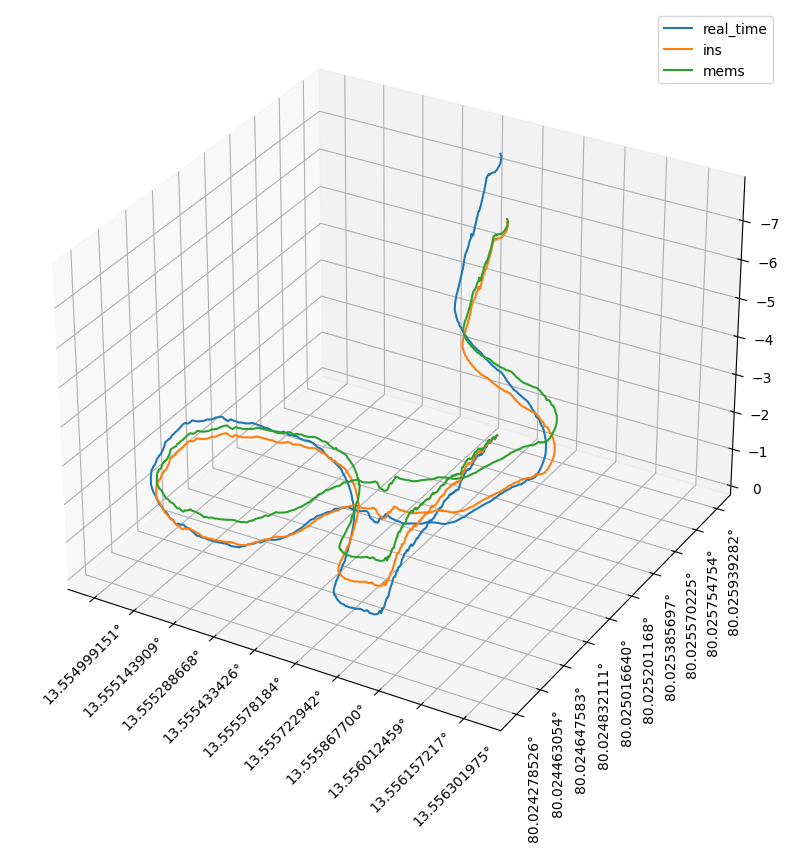

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot3D(re_lat,re_lon,re_z,label="real_time")
# ax.plot3D(id_lat,id_lon,id_z,label="ideal")
ax.plot3D(in_lat,in_lon,in_z,label="ins")
ax.plot3D(me_lat,me_lon,me_z,label="mems")
# ax.plot3D(fi_lat,fi_lon,fi_z,label="fiber")
ax.set_zlim(max(re_z), min(re_z))
ax.set_xticks(np.linspace(min(re_lat), max(re_lat), num=10))
ax.set_xticklabels([f'{ln:.9f}°' for ln in np.linspace(min(re_lat), max(re_lat), num=10)], rotation=45)
ax.set_yticks(np.linspace(min(re_lon), max(re_lon), num=10))
ax.set_yticklabels([f'{ln:.9f}°' for ln in np.linspace(min(re_lon), max(re_lon), num=10)], rotation=90)
#ax.set_zticks(np.linspace(min(bi_z), max(bi_z), num=10))
#ax.set_zticklabels([f'{ln:.1f}' for ln in np.linspace(max(bi_z), min(bi_z), num=10)], rotation=45)
plt.legend()
plt.show()



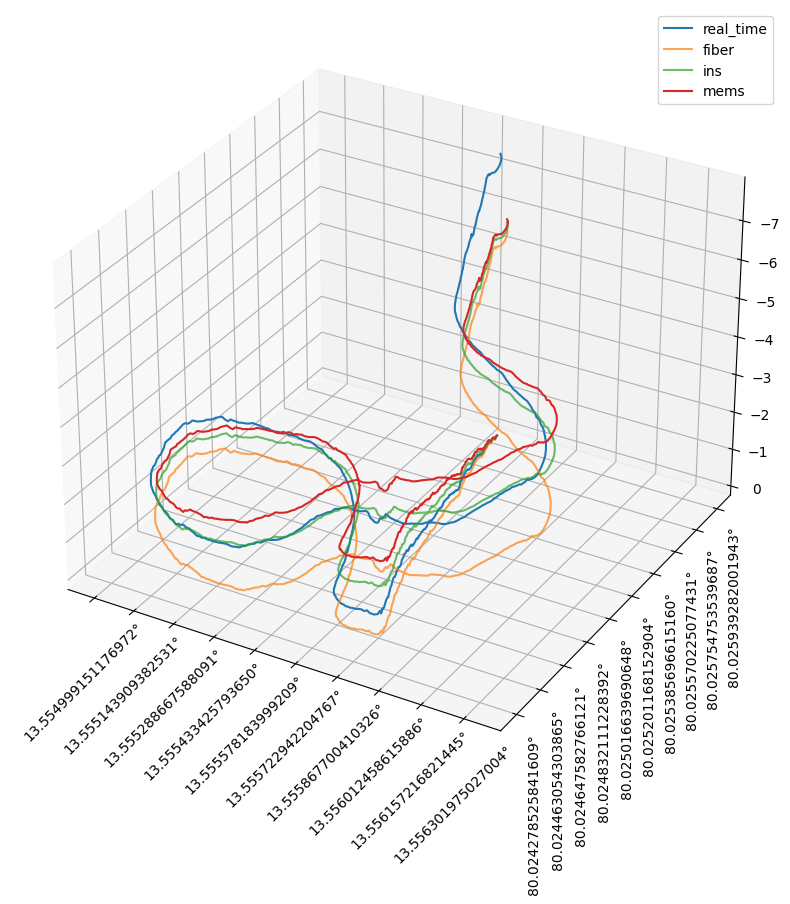

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot3D(re_lat,re_lon,re_z,label="real_time")
ax.plot3D(fi_lat,fi_lon,fi_z,label="fiber",alpha=0.7)
# ax.plot3D(id_lat,id_lon,id_z,label="ideal")
ax.plot3D(in_lat,in_lon,in_z,label="ins",alpha=0.7)
ax.plot3D(me_lat,me_lon,me_z,label="mems")
ax.set_zlim(max(re_z), min(re_z))
ax.set_xticks(np.linspace(min(re_lat), max(re_lat), num=10))
ax.set_xticklabels([f'{ln:.15f}°' for ln in np.linspace(min(re_lat), max(re_lat), num=10)], rotation=45)
ax.set_yticks(np.linspace(min(re_lon), max(re_lon), num=10))
ax.set_yticklabels([f'{ln:.15f}°' for ln in np.linspace(min(re_lon), max(re_lon), num=10)], rotation=90)
#ax.set_zticks(np.linspace(min(bi_z), max(bi_z), num=10))
#ax.set_zticklabels([f'{ln:.1f}' for ln in np.linspace(max(bi_z), min(bi_z), num=10)], rotation=45)
plt.legend()
plt.show()



In [ ]:
print(len(in_lat), len(in_lon), len(in_z))
print(len(me_lat), len(me_lon), len(me_z))


657 657 657
657 657 657


In [ ]:
import numpy as np

print(np.isnan(in_lat).any(), np.isnan(in_lon).any(), np.isnan(in_z).any())
print(np.isnan(me_lat).any(), np.isnan(me_lon).any(), np.isnan(me_z).any())


False False False
False False False


13.555626085908706
